In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
cenpops = gpd.read_file('data/nhgis0003_shape/US_tract_cenpop_2010.shp')
cenpops

,GISJOIN,GEOID,STATEFP,COUNTYFP,TRACTCE,POPULATION,LATITUDE,LONGITUDE,geometry
0,G0100010020100,01001020100,01,001,020100,1912,32.475973,-86.486772,POINT (887851.814 -517474.726)
1,G0100010020200,01001020200,01,001,020200,2170,32.471763,-86.472782,POINT (889200.085 -517811.023)
2,G0100010020300,01001020300,01,001,020300,3373,32.474011,-86.459639,POINT (890397.512 -517438.554)
3,G0100010020400,01001020400,01,001,020400,4386,32.468685,-86.443021,POINT (892002.859 -517873.612)
4,G0100010020500,01001020500,01,001,020500,10766,32.465330,-86.423696,POINT (893838.094 -518064.250)
...,...,...,...,...,...,...,...,...,...
73997,G7201530750501,72153750501,72,153,750501,4960,18.030947,-66.868030,POINT (3157557.538 -1653628.676)
73998,G7201530750502,72153750502,72,153,750502,2092,18.025411,-66.860207,POINT (3158556.581 -1653930.481)
73999,G7201530750503,72153750503,72,153,750503,2357,18.025744,-66.873776,POINT (3157121.454 -1654347.571)
74000,G7201530750601,72153750601,72,153,750601,5315,18.018029,-66.844223,POINT (3160471.741 -1654148.114)


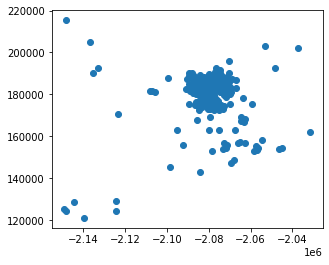

In [11]:
fresno = cenpops.loc[(cenpops.STATEFP == '06') & (cenpops.COUNTYFP == '019')]
fresno.plot()

In [14]:
tracts = pd.DataFrame({'tract_ID': fresno.GEOID.values, 
                       'X': [fresno.geometry.iloc[i].x for i in range(len(fresno.index))], 
                       'Y': [fresno.geometry.iloc[i].y for i in range(len(fresno.index))]})
!mkdir graph_tests
tracts.to_csv('graph_tests/fresno_cenpops.csv', index=False)

mkdir: cannot create directory ‘graph_tests’: File exists


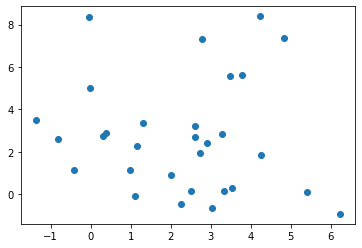

In [15]:
SIZE = 30
X_normal = np.random.gumbel(loc=1.5, scale=1.75, size=SIZE)
Y_normal = np.random.gumbel(loc=1.5, scale=1.75, size=SIZE)
IDs_normal = [f"A{i:03}" for i in range(SIZE)]
tracts_normal = pd.DataFrame({'tract_ID': IDs_normal, 'X': X_normal, 'Y': Y_normal})
plt.scatter(tracts_normal.X, tracts_normal.Y)
tracts_normal.to_csv(f'graph_tests/gumbel_{SIZE}.csv', index=False)
plt.show()